<a align="center" href="https://ultralytics.com/hub" target="_blank">
<img width="1024", src="https://github.com/ultralytics/assets/raw/main/im/ultralytics-hub.png"></a>

<div align="center">

[中文](https://docs.ultralytics.com/zh/hub/) | [한국어](https://docs.ultralytics.com/ko/hub/) | [日本語](https://docs.ultralytics.com/ja/hub/) | [Русский](https://docs.ultralytics.com/ru/hub/) | [Deutsch](https://docs.ultralytics.com/de/hub/) | [Français](https://docs.ultralytics.com/fr/hub/) | [Español](https://docs.ultralytics.com/es/hub/) | [Português](https://docs.ultralytics.com/pt/hub/) | [Türkçe](https://docs.ultralytics.com/tr/hub/) | [Tiếng Việt](https://docs.ultralytics.com/vi/hub/) | [العربية](https://docs.ultralytics.com/ar/hub/)

  <a href="https://github.com/ultralytics/hub/actions/workflows/ci.yaml"><img src="https://github.com/ultralytics/hub/actions/workflows/ci.yaml/badge.svg" alt="CI CPU"></a>
  <a href="https://colab.research.google.com/github/ultralytics/hub/blob/main/hub.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>

Welcome to the [Ultralytics](https://ultralytics.com/) HUB notebook!

This notebook allows you to train Ultralytics [YOLO](https://github.com/ultralytics/ultralytics) 🚀 models using [HUB](https://hub.ultralytics.com/). Please browse the HUB <a href="https://docs.ultralytics.com/hub/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/hub/issues/new/choose">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!
</div>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://www.pepy.tech/projects/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [ ]:
%pip install ultralytics  # install
from ultralytics import YOLO, checks, hub

checks()  # checks

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


# Start

⚡ Login with your API key, load your YOLO 🚀 model, and start training in 3 lines of code!

In [ ]:
hub.login('e273dc06c06b9ddf35029335edb6982119364059ed')

model = YOLO('https://hub.ultralytics.com/models/C5qWUpzKU7l5oQ1wLHvi')
results = model.train()

In [ ]:
!pip install ultralytics supervision accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.0 MB/s eta 0:00:00



0: 640x480 2 abdominal retractors, 2788.7ms
Speed: 3.2ms preprocess, 2788.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


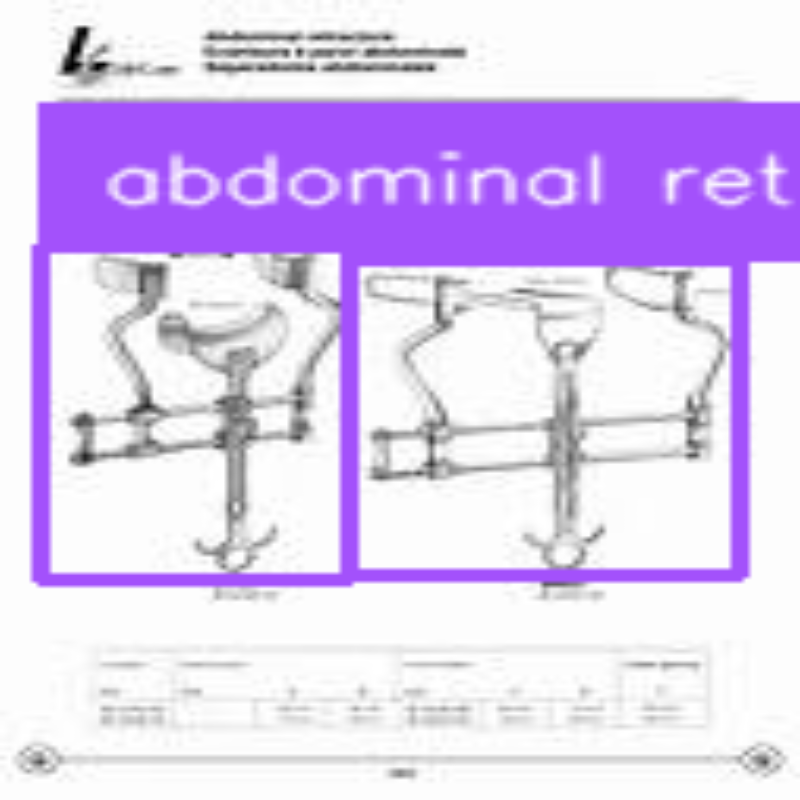

-1

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import supervision as sv
import numpy as np

model = YOLO('/content/sample_data/medins.pt')

img = cv2.imread('/content/sample_data/th (6).jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = model(img)[0]

detections = sv.Detections.from_ultralytics(result)

box_annotator = sv.BoxAnnotator()

img = box_annotator.annotate(scene=img, detections=detections)
label = sv.LabelAnnotator()
img = label.annotate(scene=img, detections=detections)

img = cv2.resize(img, (800, 800))
cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
model = YOLO('/content/sample_data/medins.pt')

cap = cv2.VideoCapture('/content/sample_data/istockphoto-1487988244-640_adpp_is.mp4')

output = cv2.VideoWriter('medins1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (768, 432))

ret=1

while ret:
  ret, frame = cap.read()
  if not ret:
    break
  img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  result = model(img)[0]

  detections = sv.Detections.from_ultralytics(result)

  box_annotator = sv.BoxAnnotator()

  img = box_annotator.annotate(scene=img, detections=detections)
  label = sv.LabelAnnotator()
  img = label.annotate(scene=img, detections=detections)
  output.write(img)

cap.release()
output.release()
cv2.destroyAllWindows()